In [1]:
#Importing Packages

%matplotlib inline
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import seaborn as sns

## Feature Exploration

In [2]:
data = pd.read_csv("No-show-Issue-Comma-300k.csv")

In [3]:
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [4]:
data.dtypes

Age                         int64
Gender                     object
AppointmentRegistration    object
ApointmentData             object
DayOfTheWeek               object
Status                     object
Diabetes                    int64
Alcoolism                   int64
HiperTension                int64
Handcap                     int64
Smokes                      int64
Scholarship                 int64
Tuberculosis                int64
Sms_Reminder                int64
AwaitingTime                int64
dtype: object

In [5]:
data.shape # In total we have 300k observations and 15 features in dataset

(300000, 15)

In [6]:
#Observing the number of distinct values in features

for column in list(data.columns):
    print("{0:25} {1}".format(column, data[column].nunique()))

Age                       109
Gender                    2
AppointmentRegistration   295425
ApointmentData            534
DayOfTheWeek              7
Status                    2
Diabetes                  2
Alcoolism                 2
HiperTension              2
Handcap                   5
Smokes                    2
Scholarship               2
Tuberculosis              2
Sms_Reminder              3
AwaitingTime              213


In [7]:
def features_plots(discrete_vars):
    
    plt.figure(figsize=(15,30))
    
    for i, cv in enumerate(['Age', 'AwaitingTime']): #Continious Variables
        plt.subplot(7, 2, i+1)
        plt.hist(data[cv], bins=len(data[cv].unique()))
        plt.title(cv)
        plt.ylabel('Frequency')
        
    for i, dv in enumerate(discrete_vars): #Discrete Variables
        plt.subplot(7, 2, i+3)
        data[dv].value_counts().plot(kind='bar', title=dv)
        plt.ylabel('Frequency')

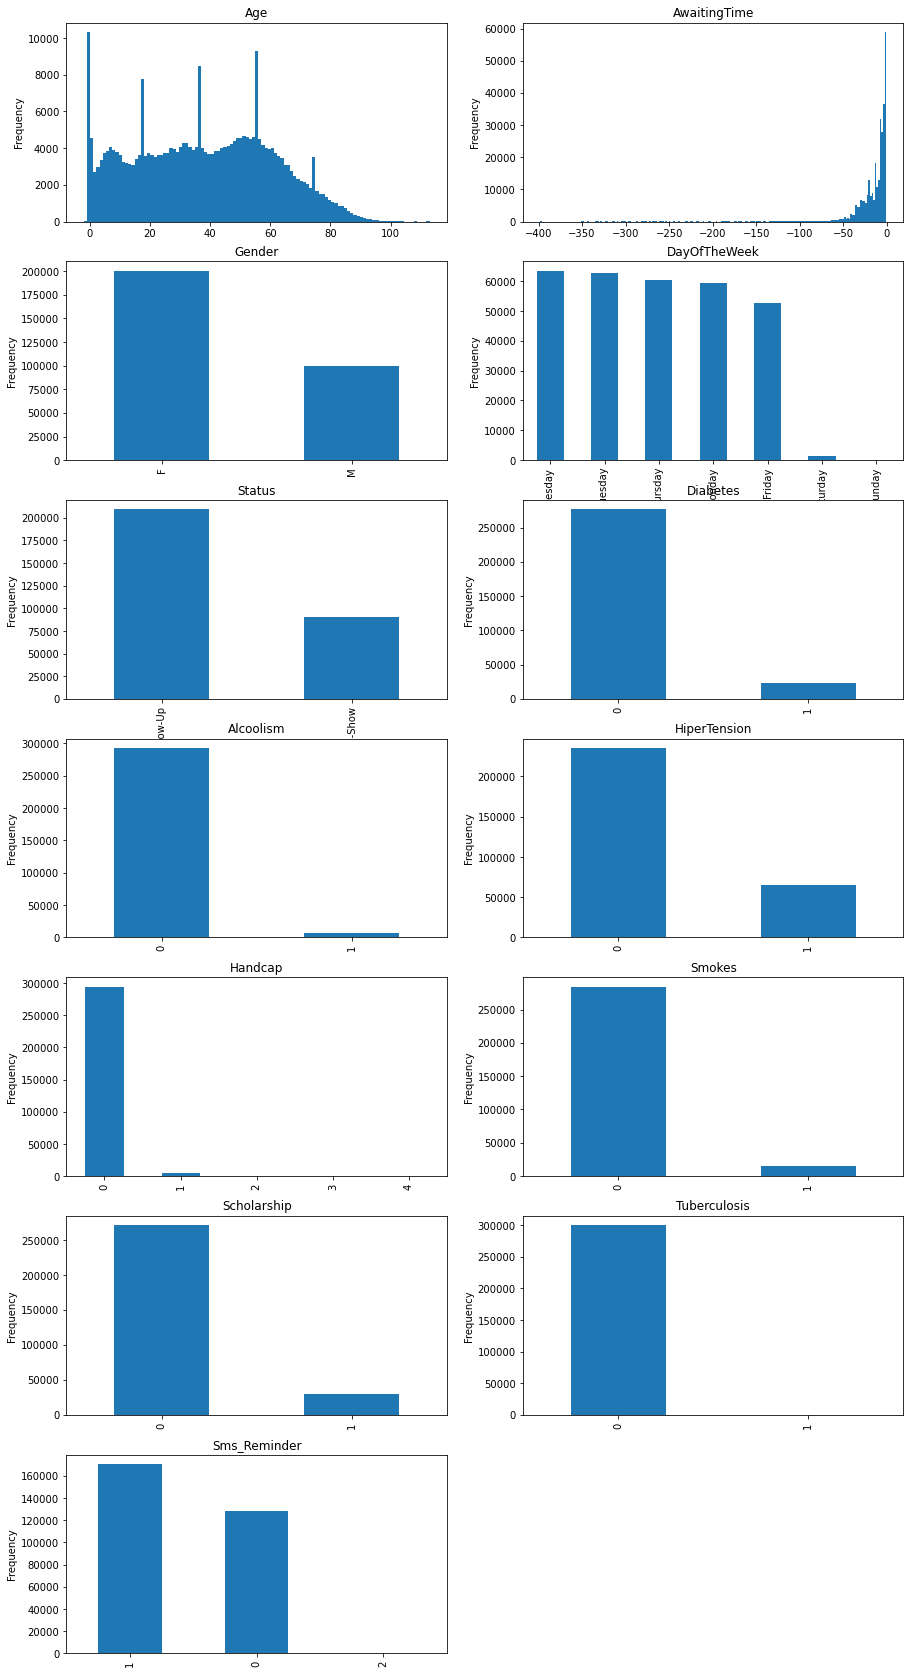

In [8]:
discrete_vars = ['Gender', 'DayOfTheWeek', 'Status', 'Diabetes',
                     'Alcoolism', 'HiperTension', 'Handcap', 'Smokes',
                         'Scholarship', 'Tuberculosis', 'Sms_Reminder']

features_plots(discrete_vars)

/home/jalalmansoori/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

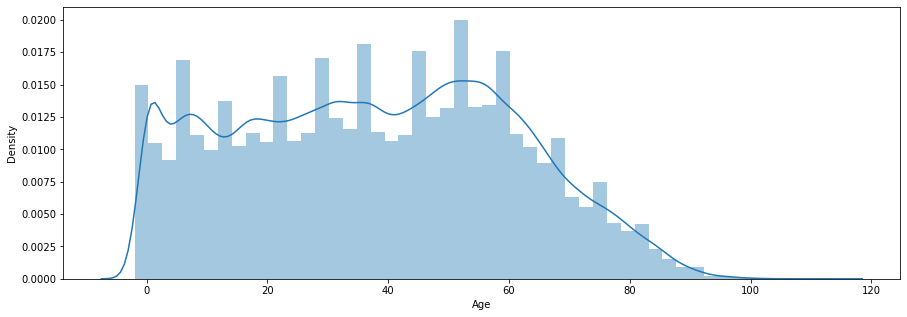

In [9]:
sns.distplot(data['Age'])

<AxesSubplot:>

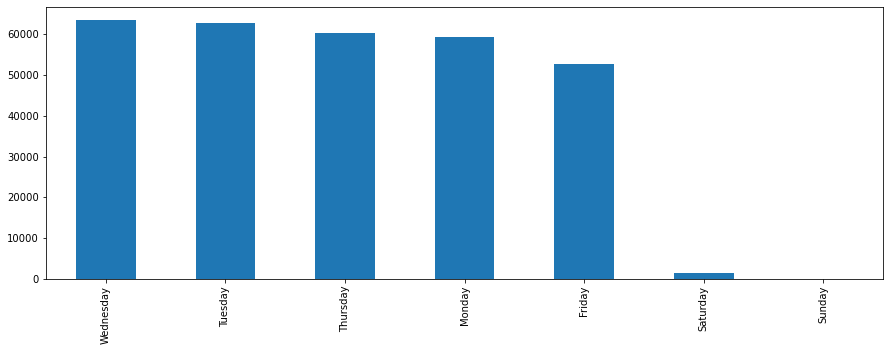

In [10]:
data['DayOfTheWeek'].value_counts().plot(kind='bar')

## Performing Data  Wrangling
## For Age Feature

In [11]:
#Counting Frequency of Negative Age Observations

data[data['Age'] < 0]['Age'].value_counts().sum()

6

In [12]:
## Removing Observations with Negative Age Values

data = data[data['Age'] >= 0]

## Note: Check the 0 value in Age Feature!

## Removing Handcap Feature

In [13]:
del data['Handcap']

In [14]:
data.shape

(299994, 14)

## For Awaiting Time

In [15]:
#Transforming Negative values to Positive Values
data['AwaitingTime'] = data['AwaitingTime'].apply(lambda x: abs(x))

## Encoding Categorical Features

In [16]:
# Encoding Ordinal Feature Day of the Week

dow_mapping = {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 
               'Friday' : 4, 'Saturday' : 5, 'Sunday' : 6}


data['DayOfTheWeek'] = data['DayOfTheWeek'].map(dow_mapping)

In [17]:
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,Show-Up,0,0,0,0,0,0,0,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,Show-Up,0,0,0,0,0,0,1,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,Show-Up,0,0,0,0,0,0,1,6


In [19]:
for field in ['Gender', 'Status']:
    data[field] = pd.Categorical(data[field]).codes

In [20]:
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,1,0,0,0,0,0,0,0,29
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,1,0,0,0,0,0,0,0,1
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,1,0,0,0,0,0,0,0,1
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,1,0,0,0,0,0,0,1,15
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,1,0,0,0,0,0,0,1,6


In [22]:
# Saving clean  (No Show Medical Appointments) Dataset

data.to_csv('clean_df.csv')

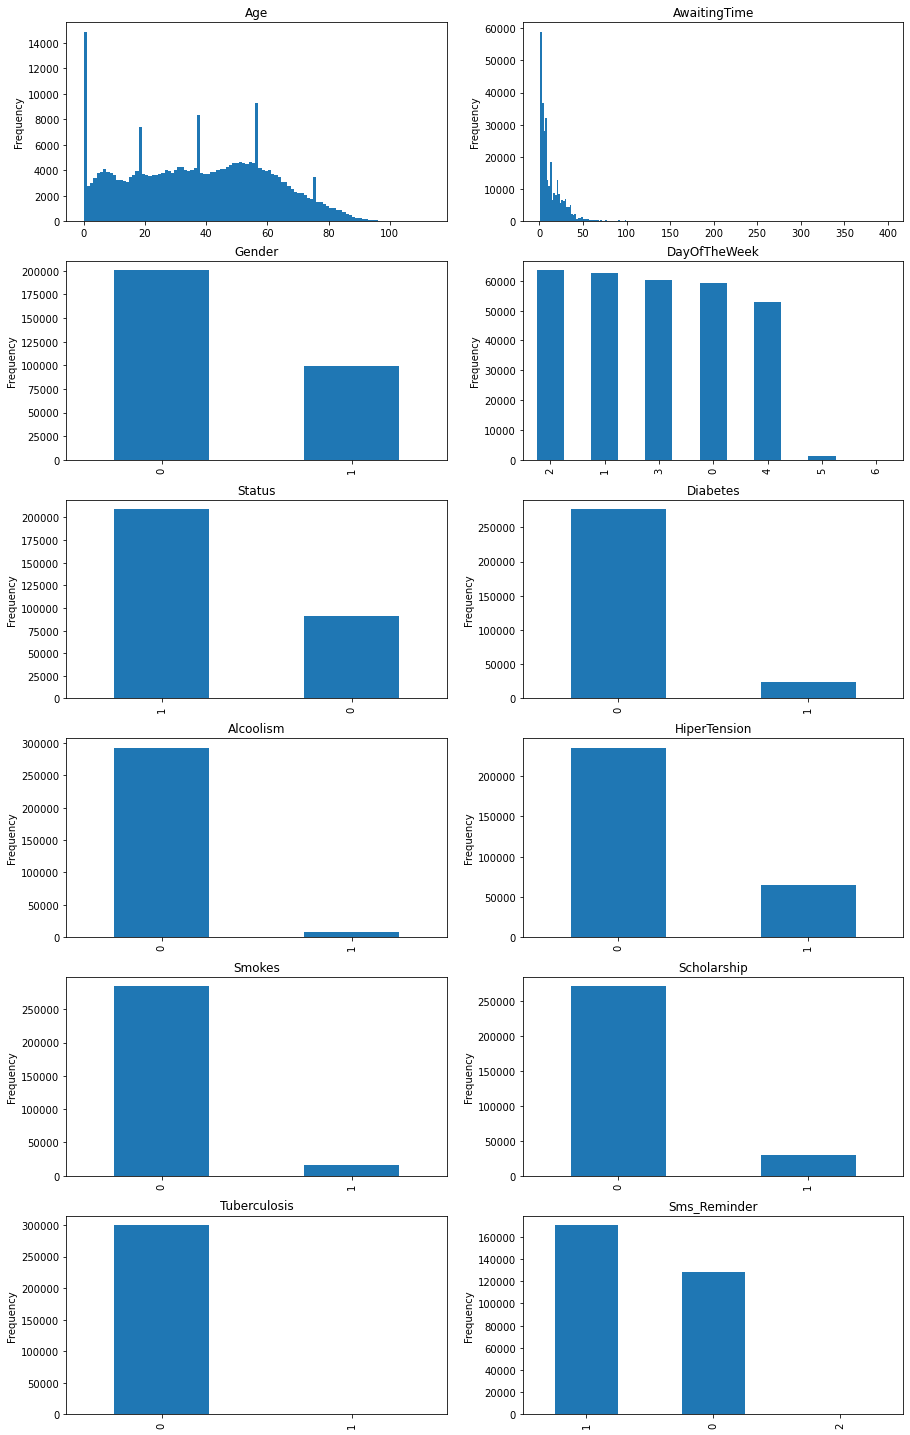

In [21]:
## Visualizing the Feature plots after clean the dataset

discrete_vars = ['Gender', 'DayOfTheWeek', 'Status', 'Diabetes',
                     'Alcoolism', 'HiperTension', 'Smokes',
                         'Scholarship', 'Tuberculosis', 'Sms_Reminder']
features_plots(discrete_vars)